# Adem YILDIZ - 1801022058
## ELM463 - PROJE
##### Araç Plakasının Yerinin Bulunması
---

In [1]:
# gerekli kütüphanelerin yüklenmesi

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import imutils

# egitim1 görünütüsü

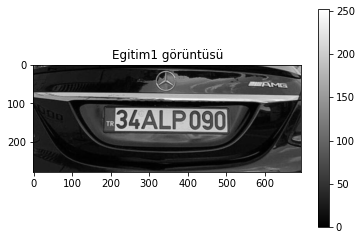

In [2]:
# görüntünün yüklenmesi

egitim1 = cv.imread("egitim1.pgm", 0)

%matplotlib inline
plt.figure()
plt.imshow(egitim1, cmap = "gray")
plt.title("Egitim1 görüntüsü")
plt.colorbar()

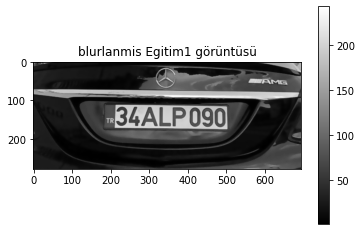

In [3]:
# gürültüyü azaltmak için blurlama işlemini yapabilecek bir filtre uygulanıyor

egitim1 = cv.bilateralFilter(egitim1, 11, 17, 17)

plt.figure()
plt.imshow(egitim1, cmap = "gray")
plt.title("blurlanmis Egitim1 görüntüsü")
plt.colorbar()

görüntünün max pixeli:  243
Toplam Pr =  1.0000000000000007
mean value =  57.78138037224687
total variance =  3392.815369869142
maximum değere sahip index:  107


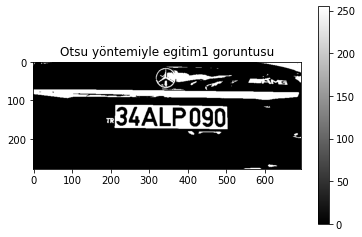

In [4]:
# sonraki adım olarak görüntüye otsu ile thresholding uygulanıyor

nrows_egitim1 = egitim1.shape[0]
ncols_egitim1 = egitim1.shape[1]

imageSize_egitim1 = nrows_egitim1*ncols_egitim1

maxPixel = np.amax(egitim1) # görüntüdeki max pixel'e ulasmak icin
print("görüntünün max pixeli: ", maxPixel)

Hr_egitim1 = np.zeros(256) # H(r) başta 0 değerleri ile dolduruldu
Pr_egitim1 = np.zeros(256) # P(r) başta 0 değerleri ile dolduruldu
totalP_egitim1 = 0 # P(r)'nin toplamının 1 olması gerektiğini biliyorum
# kontrol amaçlı totalP değişkeni oluşturdum

for rows in range(nrows_egitim1):
    for cols in range(ncols_egitim1):
        r = int(egitim1[rows, cols]) # pixel değeri r'ye atıldı
        Hr_egitim1[r] = Hr_egitim1[r] + 1 # r indexi +1 artırıldı
# böylece hangi pixelden kaç tane var bilmiş olacağız

for i in range(256):
    Pr_egitim1[i] = Hr_egitim1[i] / imageSize_egitim1 # P(r) oluşturuldu
    totalP_egitim1 = totalP_egitim1 + Pr_egitim1[i] # kontrol amaçlı toplama
    
print("Toplam Pr = ", totalP_egitim1)

# mean value hesabı

meanValue_egitim1 = 0

for i in range(256): # görüntü boyunca
    meanValue_egitim1 = meanValue_egitim1 + i*Pr_egitim1[i] # tüm görüntü için mean value formülü
print("mean value = ", meanValue_egitim1)

# total variance hesabı

totalVariance_egitim1 = 0

for i in range(256): # görüntü boyunca
    totalVariance_egitim1 = totalVariance_egitim1 + ((i - meanValue_egitim1)**2) * Pr_egitim1[i] # toplam varyans formülü
print("total variance = ", totalVariance_egitim1)

# between group variance hesabı yapılacak
# her bir t (yani eşik değeri) için between group variance hesaplanacak
# hangi t değeri maksimumum değerini veriyorsa o değer eşik değeri olacak

sigmaB_Values_egitim1 = list() # sigma değerlerini saklamak için boş bir liste tanımladım

for t in range(1, 256):
    q1_egitim1 = np.sum(Pr_egitim1[:t+1]) # q1 formülü uygulandı, 1'den t'ye kadar
    
    q2_egitim1 = np.sum(Pr_egitim1[t:]) # q2 formülü uygulandı, t'den 256'ya kadar
    
    # her t değeri için hesaplama yapıldığı için nu1 ve nu2'yi her döngüde sıfıra eşitliyorum
    nu1_egitim1 = 0
    nu2_egitim1 = 0
    
    for t1 in range(1, t+1): # en son t değerini alması gerekmektedir, o yüzden range'i t+1'e kadar
        if (q1_egitim1 != 0):
            nu1_egitim1 = nu1_egitim1 + t1 * (Pr_egitim1[t1] / q1_egitim1) # nu1 formülü uygulandı
    
    for t2 in range(t+1, 256): # başlangıç değeri t+1 olmalı, 255'e kadar gidecek
        if (q2_egitim1 != 0):
            nu2_egitim1 = nu2_egitim1 + t2 * (Pr_egitim1[t2] / q2_egitim1) # nu2 formülü uygulandı

    sigmaB_egitim1 = q1_egitim1*q2_egitim1*((nu1_egitim1 - nu2_egitim1)**2) # sigma formülü uygulandı
    sigmaB_Values_egitim1.append(sigmaB_egitim1) # sigma değerleri için tanımlanan boş listeye sigma değerleri atandı

print("maximum değere sahip index: ", np.argmax(sigmaB_Values_egitim1))
# np.argmax() sayesinde maximum elemanın indexine ulaşıldı

T_egitim1 = np.argmax(sigmaB_Values_egitim1)

egitim1[egitim1 >= T_egitim1] = 255
egitim1[egitim1 < T_egitim1] = 0

plt.figure()
plt.imshow(egitim1, cmap = "gray")
plt.title("Otsu yöntemiyle egitim1 goruntusu")
plt.colorbar()

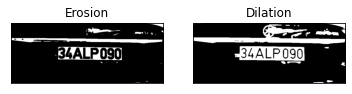

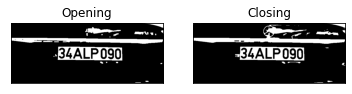

In [5]:
# plaka dikdörtgen olduğu için structuring elemen rect seçildi
# plakanın etrafındaki gürültüleri ve istenmeyen sembolleri baskılamak için
# opening kullanıldı

stEl = cv.getStructuringElement(cv.MORPH_RECT,(4,4))


erosion = cv.erode(egitim1, stEl, iterations = 1)
dilation = cv.dilate(egitim1, stEl, iterations = 1)
opening = cv.morphologyEx(egitim1, cv.MORPH_OPEN, stEl)
closing = cv.morphologyEx(egitim1, cv.MORPH_CLOSE, stEl)

# plt.figure()
# plt.imshow(opening, cmap = "gray")
# plt.title("opening Egitim1 görüntüsü")
# plt.colorbar()


plt.figure()
plt.subplot(121),plt.imshow(erosion, cmap = "gray"),plt.title('Erosion')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation, cmap = "gray"),plt.title('Dilation')
plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(opening, cmap = "gray"),plt.title('Opening')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing, cmap = "gray"),plt.title('Closing')
plt.xticks([]), plt.yticks([])
plt.show()

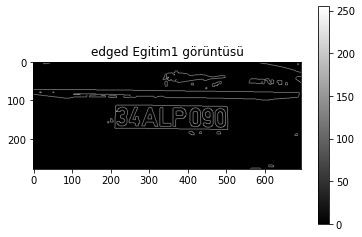

In [6]:
# sınırların net olması için edge detection yapıldı

edged = cv.Canny(opening, 30, 200) #Edge detection

plt.figure()
plt.imshow(edged, cmap = "gray")
plt.title("edged Egitim1 görüntüsü")
plt.colorbar()

plakanın koordinatları:
 [[[213 114]]

 [[212 171]]

 [[504 174]]

 [[501 115]]]


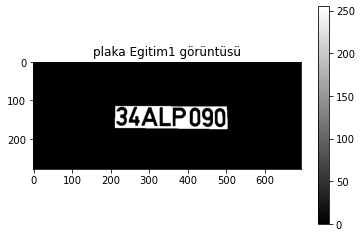

In [7]:
# findContours ile siyah arkaplan üstündeki beyaz noktalar bulundu
# ilk argüman olarak uygulanacak görüntünün kopyası alındı
# çünkü bazı opencv versiyonlarında orijinal görüntüyü değiştiriyor

# corners denilen değişken ile bir şeklin sınırlarının koordinatları tutulur
# ikinci parametre RETR_TREE ile içiçe contourlar bir arada tutuldu
# üçüncü parametre CHAIN_APPROX_SIMPL ile plakadaki tüm noktalar değil de
# yalnızca köşelerdeki noktalar keypoint olarak tutuldu


corners = cv.findContours(edged.copy(), cv.RETR_TREE,
                                                     cv.CHAIN_APPROX_SIMPLE)

# bu keypointerden uygun contours'ları tutmak için tuple tipinde bir değişken:
contours = imutils.grab_contours(corners)

# bu tuple'lı sıralıyoruz ilk 10 contour'ı alıyoruz
contours = sorted(contours, key=cv.contourArea, reverse=True)[:10]

coordinate = None # koordinatları tutmak için değişken
for contour in contours: # belirlediğimiz contour'ların içindeyiz
    # approx ile dikdörtgen olmasını beklediğimiz nesneleri tutuyoruz
    # ikinci parametre ne kadar yüksek olursa yaklaşım yaparken toleransı o kadar yüksek olur
    approx = cv.approxPolyDP(contour, 10, True)
    if len(approx) == 4: # eğer yaklaşım 4 keypoint içeriyorsa
        coordinate = approx # koordinatımız o olsun
        break
print("plakanın koordinatları:\n", coordinate)

# şimdi yalnızca bu koordinattaki kısmı göreceğiz
# sıfırlardan oluşan(simsiyah), orijinal görüntüyle aynı boyutta bir maske
mask = np.zeros(egitim1.shape, np.uint8) 

# drawContours ile maskenin üstünde belirlenen koordinatları çizdirdim
new_image = cv.drawContours(mask, [coordinate], 0,255, -1)
# orijinal görüntünün üstüne maskeyi bitwise_and fonksiyonu ile koydum
new_image = cv.bitwise_and(egitim1, egitim1, mask=mask)

# sadece belirlenen koordinatları gösteren görüntü new_image olarak elde edildi
plt.figure()
plt.imshow(new_image, cmap = "gray")
plt.title("plaka Egitim1 görüntüsü")
plt.colorbar()

# egitim2 görüntüsü

görüntünün max pixeli:  245
Toplam Pr =  0.9999999999999998
mean value =  103.57725428690924
total variance =  4597.743964857546
maximum değere sahip index:  116
plakanın koordinatları:
 [[[492 466]]

 [[497 569]]

 [[714 565]]

 [[710 460]]]


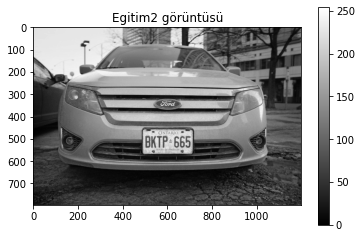

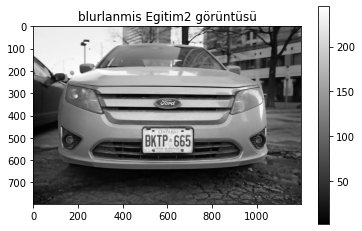

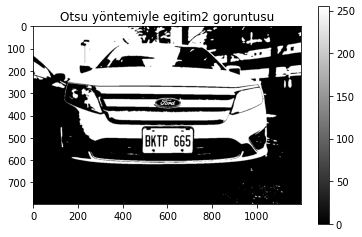

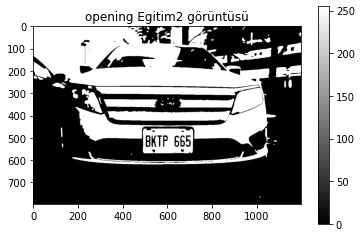

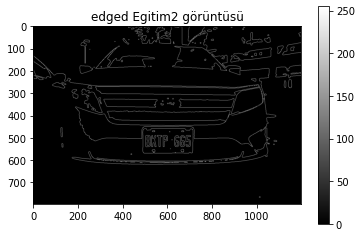

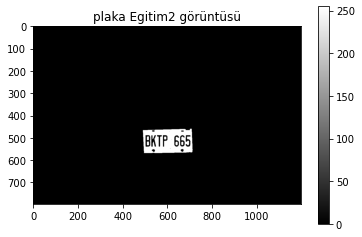

In [8]:
egitim = cv.imread("egitim2.pgm", 0)

plt.figure()
plt.imshow(egitim, cmap = "gray")
plt.title("Egitim2 görüntüsü")
plt.colorbar()

# gürültüyü azaltmak için blurlama işlemini yapabilecek bir filtre uygulanıyor

egitim = cv.bilateralFilter(egitim, 11, 17, 17)

plt.figure()
plt.imshow(egitim, cmap = "gray")
plt.title("blurlanmis Egitim2 görüntüsü")
plt.colorbar()

nrows_egitim = egitim.shape[0]
ncols_egitim = egitim.shape[1]

imageSize_egitim = nrows_egitim*ncols_egitim

maxPixel = np.amax(egitim) # görüntüdeki max pixel'e ulasmak icin
print("görüntünün max pixeli: ", maxPixel)

Hr_egitim = np.zeros(256) # H(r) başta 0 değerleri ile dolduruldu
Pr_egitim = np.zeros(256) # P(r) başta 0 değerleri ile dolduruldu
totalP_egitim = 0 # P(r)'nin toplamının 1 olması gerektiğini biliyorum
# kontrol amaçlı totalP değişkeni oluşturdum

for rows in range(nrows_egitim):
    for cols in range(ncols_egitim):
        r = int(egitim[rows, cols]) # pixel değeri r'ye atıldı
        Hr_egitim[r] = Hr_egitim[r] + 1 # r indexi +1 artırıldı
# böylece hangi pixelden kaç tane var bilmiş olacağız

for i in range(256):
    Pr_egitim[i] = Hr_egitim[i] / imageSize_egitim # P(r) oluşturuldu
    totalP_egitim = totalP_egitim + Pr_egitim[i] # kontrol amaçlı toplama
    
print("Toplam Pr = ", totalP_egitim)

# mean value hesabı

meanValue_egitim = 0

for i in range(256): # görüntü boyunca
    meanValue_egitim = meanValue_egitim + i*Pr_egitim[i] # tüm görüntü için mean value formülü
print("mean value = ", meanValue_egitim)

# total variance hesabı

totalVariance_egitim = 0

for i in range(256): # görüntü boyunca
    totalVariance_egitim = totalVariance_egitim + ((i - meanValue_egitim)**2) * Pr_egitim[i] # toplam varyans formülü
print("total variance = ", totalVariance_egitim)

# between group variance hesabı yapılacak
# her bir t (yani eşik değeri) için between group variance hesaplanacak
# hangi t değeri maksimumum değerini veriyorsa o değer eşik değeri olacak

sigmaB_Values_egitim = list() # sigma değerlerini saklamak için boş bir liste tanımladım

for t in range(1, 256):
    q1_egitim = np.sum(Pr_egitim[:t+1]) # q1 formülü uygulandı, 1'den t'ye kadar
    
    q2_egitim = np.sum(Pr_egitim[t:]) # q2 formülü uygulandı, t'den 256'ya kadar
    
    # her t değeri için hesaplama yapıldığı için nu1 ve nu2'yi her döngüde sıfıra eşitliyorum
    nu1_egitim = 0
    nu2_egitim = 0
    
    for t1 in range(1, t+1): # en son t değerini alması gerekmektedir, o yüzden range'i t+1'e kadar
        if (q1_egitim != 0):
            nu1_egitim = nu1_egitim + t1 * (Pr_egitim[t1] / q1_egitim) # nu1 formülü uygulandı
    
    for t2 in range(t+1, 256): # başlangıç değeri t+1 olmalı, 255'e kadar gidecek
        if (q2_egitim != 0):
            nu2_egitim = nu2_egitim + t2 * (Pr_egitim[t2] / q2_egitim) # nu2 formülü uygulandı

    sigmaB_egitim = q1_egitim*q2_egitim*((nu1_egitim - nu2_egitim)**2) # sigma formülü uygulandı
    sigmaB_Values_egitim.append(sigmaB_egitim) # sigma değerleri için tanımlanan boş listeye sigma değerleri atandı

print("maximum değere sahip index: ", np.argmax(sigmaB_Values_egitim))
# np.argmax() sayesinde maximum elemanın indexine ulaşıldı

T_egitim = np.argmax(sigmaB_Values_egitim)

egitim[egitim >= T_egitim] = 255
egitim[egitim < T_egitim] = 0

plt.figure()
plt.imshow(egitim, cmap = "gray")
plt.title("Otsu yöntemiyle egitim2 goruntusu")
plt.colorbar()

# plaka dikdörtgen olduğu için structuring elemen rect seçildi
# plakanın etrafındaki gürültüleri ve istenmeyen sembolleri baskılamak için
# opening kullanıldı

stEl = cv.getStructuringElement(cv.MORPH_RECT,(4,4))

opening = cv.morphologyEx(egitim, cv.MORPH_OPEN, stEl)

plt.figure()
plt.imshow(opening, cmap = "gray")
plt.title("opening Egitim2 görüntüsü")
plt.colorbar()

# sınırların net olması için edge detection yapıldı

edged = cv.Canny(opening, 30, 200) #Edge detection

plt.figure()
plt.imshow(edged, cmap = "gray")
plt.title("edged Egitim2 görüntüsü")
plt.colorbar()

# findContours ile siyah arkaplan üstündeki beyaz noktalar bulundu
# ilk argüman olarak uygulanacak görüntünün kopyası alındı
# çünkü bazı opencv versiyonlarında orijinal görüntüyü değiştiriyor

# keypoints denilen değişken ile bir şeklin sınırlarının koordinatları tutulur
# ikinci parametre RETR_TREE ile içiçe contourlar bir arada tutuldu
# üçüncü parametre CHAIN_APPROX_SIMPL ile plakadaki tüm noktalar değil de
# yalnızca köşelerdeki noktalar keypoint olarak tutuldu

corners = cv.findContours(edged.copy(), cv.RETR_TREE,
                                                     cv.CHAIN_APPROX_SIMPLE)

# bu keypointerden uygun contours'ları tutmak için tuple tipinde bir değişken:
contours = imutils.grab_contours(corners)

# bu tuple'lı sıralıyoruz ilk 10 contour'ı alıyoruz
contours = sorted(contours, key=cv.contourArea, reverse=True)[:10]

coordinate = None # koordinatları tutmak için değişken
for contour in contours: # belirlediğimiz contour'ların içindeyiz
    # approx ile dikdörtgen olmasını beklediğimiz nesneleri tutuyoruz
    # ikinci parametre ne kadar yüksek olursa yaklaşım yaparken toleransı o kadar yüksek olur
    approx = cv.approxPolyDP(contour, 10, True)
    if len(approx) == 4: # eğer yaklaşım 4 keypoint içeriyorsa
        coordinate = approx # koordinatımız o olsun
        break
print("plakanın koordinatları:\n", coordinate)

# şimdi yalnızca bu koordinattaki kısmı göreceğiz
# sıfırlardan oluşan(simsiyah), orijinal görüntüyle aynı boyutta bir maske
mask = np.zeros(egitim.shape, np.uint8) 

# drawContours ile maskenin üstünde belirlenen koordinatları çizdirdim
new_image = cv.drawContours(mask, [coordinate], 0,255, -1)
# orijinal görüntünün üstüne maskeyi bitwise_and fonksiyonu ile koydum
new_image = cv.bitwise_and(egitim, egitim, mask=mask)

# sadece belirlenen koordinatları gösteren görüntü new_image olarak elde edildi
plt.figure()
plt.imshow(new_image, cmap = "gray")
plt.title("plaka Egitim2 görüntüsü")
plt.colorbar()

# egitim3 görüntüsü

görüntünün max pixeli:  255
Toplam Pr =  0.9999999999999994
mean value =  89.64722470238088
total variance =  1609.6804677441519
maximum değere sahip index:  141
plakanın koordinatları:
 [[[469  23]]

 [[498  66]]

 [[797  71]]

 [[742  25]]]


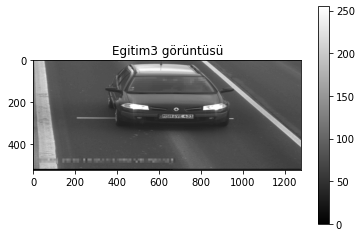

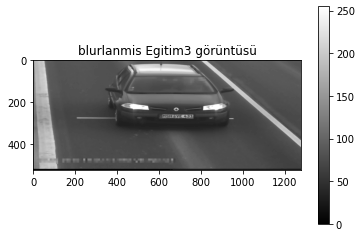

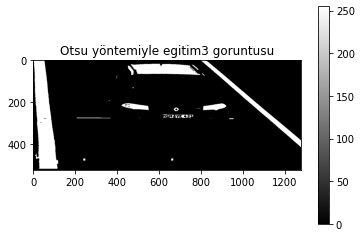

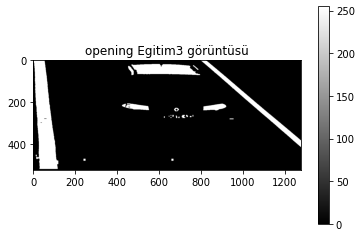

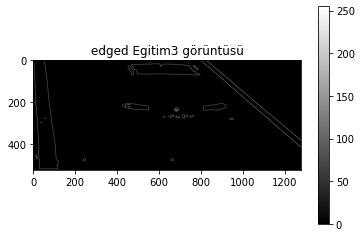

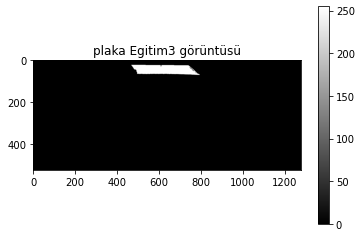

In [9]:
egitim = cv.imread("egitim3.pgm", 0)

plt.figure()
plt.imshow(egitim, cmap = "gray")
plt.title("Egitim3 görüntüsü")
plt.colorbar()

# gürültüyü azaltmak için blurlama işlemini yapabilecek bir filtre uygulanıyor

egitim = cv.bilateralFilter(egitim, 11, 17, 17)

plt.figure()
plt.imshow(egitim, cmap = "gray")
plt.title("blurlanmis Egitim3 görüntüsü")
plt.colorbar()

nrows_egitim = egitim.shape[0]
ncols_egitim = egitim.shape[1]

imageSize_egitim = nrows_egitim*ncols_egitim

maxPixel = np.amax(egitim) # görüntüdeki max pixel'e ulasmak icin
print("görüntünün max pixeli: ", maxPixel)

Hr_egitim = np.zeros(256) # H(r) başta 0 değerleri ile dolduruldu
Pr_egitim = np.zeros(256) # P(r) başta 0 değerleri ile dolduruldu
totalP_egitim = 0 # P(r)'nin toplamının 1 olması gerektiğini biliyorum
# kontrol amaçlı totalP değişkeni oluşturdum

for rows in range(nrows_egitim):
    for cols in range(ncols_egitim):
        r = int(egitim[rows, cols]) # pixel değeri r'ye atıldı
        Hr_egitim[r] = Hr_egitim[r] + 1 # r indexi +1 artırıldı
# böylece hangi pixelden kaç tane var bilmiş olacağız

for i in range(256):
    Pr_egitim[i] = Hr_egitim[i] / imageSize_egitim # P(r) oluşturuldu
    totalP_egitim = totalP_egitim + Pr_egitim[i] # kontrol amaçlı toplama
    
print("Toplam Pr = ", totalP_egitim)

# mean value hesabı

meanValue_egitim = 0

for i in range(256): # görüntü boyunca
    meanValue_egitim = meanValue_egitim + i*Pr_egitim[i] # tüm görüntü için mean value formülü
print("mean value = ", meanValue_egitim)

# total variance hesabı

totalVariance_egitim = 0

for i in range(256): # görüntü boyunca
    totalVariance_egitim = totalVariance_egitim + ((i - meanValue_egitim)**2) * Pr_egitim[i] # toplam varyans formülü
print("total variance = ", totalVariance_egitim)

# between group variance hesabı yapılacak
# her bir t (yani eşik değeri) için between group variance hesaplanacak
# hangi t değeri maksimumum değerini veriyorsa o değer eşik değeri olacak

sigmaB_Values_egitim = list() # sigma değerlerini saklamak için boş bir liste tanımladım

for t in range(1, 256):
    q1_egitim = np.sum(Pr_egitim[:t+1]) # q1 formülü uygulandı, 1'den t'ye kadar
    
    q2_egitim = np.sum(Pr_egitim[t:]) # q2 formülü uygulandı, t'den 256'ya kadar
    
    # her t değeri için hesaplama yapıldığı için nu1 ve nu2'yi her döngüde sıfıra eşitliyorum
    nu1_egitim = 0
    nu2_egitim = 0
    
    for t1 in range(1, t+1): # en son t değerini alması gerekmektedir, o yüzden range'i t+1'e kadar
        if (q1_egitim != 0):
            nu1_egitim = nu1_egitim + t1 * (Pr_egitim[t1] / q1_egitim) # nu1 formülü uygulandı
    
    for t2 in range(t+1, 256): # başlangıç değeri t+1 olmalı, 255'e kadar gidecek
        if (q2_egitim != 0):
            nu2_egitim = nu2_egitim + t2 * (Pr_egitim[t2] / q2_egitim) # nu2 formülü uygulandı

    sigmaB_egitim = q1_egitim*q2_egitim*((nu1_egitim - nu2_egitim)**2) # sigma formülü uygulandı
    sigmaB_Values_egitim.append(sigmaB_egitim) # sigma değerleri için tanımlanan boş listeye sigma değerleri atandı

print("maximum değere sahip index: ", np.argmax(sigmaB_Values_egitim))
# np.argmax() sayesinde maximum elemanın indexine ulaşıldı

T_egitim = np.argmax(sigmaB_Values_egitim)

egitim[egitim >= T_egitim] = 255
egitim[egitim < T_egitim] = 0

plt.figure()
plt.imshow(egitim, cmap = "gray")
plt.title("Otsu yöntemiyle egitim3 goruntusu")
plt.colorbar()

# plaka dikdörtgen olduğu için structuring elemen rect seçildi
# plakanın etrafındaki gürültüleri ve istenmeyen sembolleri baskılamak için
# opening kullanıldı

stEl = cv.getStructuringElement(cv.MORPH_RECT,(4,4))

opening = cv.morphologyEx(egitim, cv.MORPH_OPEN, stEl)

plt.figure()
plt.imshow(opening, cmap = "gray")
plt.title("opening Egitim3 görüntüsü")
plt.colorbar()

# sınırların net olması için edge detection yapıldı

edged = cv.Canny(opening, 30, 200) #Edge detection

plt.figure()
plt.imshow(edged, cmap = "gray")
plt.title("edged Egitim3 görüntüsü")
plt.colorbar()

# findContours ile siyah arkaplan üstündeki beyaz noktalar bulundu
# ilk argüman olarak uygulanacak görüntünün kopyası alındı
# çünkü bazı opencv versiyonlarında orijinal görüntüyü değiştiriyor

# keypoints denilen değişken ile bir şeklin sınırlarının koordinatları tutulur
# ikinci parametre RETR_TREE ile içiçe contourlar bir arada tutuldu
# üçüncü parametre CHAIN_APPROX_SIMPL ile plakadaki tüm noktalar değil de
# yalnızca köşelerdeki noktalar keypoint olarak tutuldu

corners = cv.findContours(edged.copy(), cv.RETR_TREE,
                                                     cv.CHAIN_APPROX_SIMPLE)

# bu keypointerden uygun contours'ları tutmak için tuple tipinde bir değişken:
contours = imutils.grab_contours(corners)

# bu tuple'lı sıralıyoruz ilk 10 contour'ı alıyoruz
contours = sorted(contours, key=cv.contourArea, reverse=True)[:10]

coordinate = None # koordinatları tutmak için değişken
for contour in contours: # belirlediğimiz contour'ların içindeyiz
    # approx ile dikdörtgen olmasını beklediğimiz nesneleri tutuyoruz
    # ikinci parametre ne kadar yüksek olursa yaklaşım yaparken toleransı o kadar yüksek olur
    approx = cv.approxPolyDP(contour, 10, True)
    if len(approx) == 4: # eğer yaklaşım 4 keypoint içeriyorsa
        coordinate = approx # koordinatımız o olsun
        break
print("plakanın koordinatları:\n", coordinate)

# şimdi yalnızca bu koordinattaki kısmı göreceğiz
# sıfırlardan oluşan(simsiyah), orijinal görüntüyle aynı boyutta bir maske
mask = np.zeros(egitim.shape, np.uint8) 

# drawContours ile maskenin üstünde belirlenen koordinatları çizdirdim
new_image = cv.drawContours(mask, [coordinate], 0,255, -1)
# orijinal görüntünün üstüne maskeyi bitwise_and fonksiyonu ile koydum
new_image = cv.bitwise_and(egitim, egitim, mask=mask)

# sadece belirlenen koordinatları gösteren görüntü new_image olarak elde edildi
plt.figure()
plt.imshow(new_image, cmap = "gray")
plt.title("plaka Egitim3 görüntüsü")
plt.colorbar()

# egitim4 görüntüsü

görüntünün max pixeli:  255
Toplam Pr =  0.9999999999999996
mean value =  127.33091674804687
total variance =  4148.160378952867
maximum değere sahip index:  123
plakanın koordinatları:
 [[[ 654 1143]]

 [[ 659 1269]]

 [[1302 1287]]

 [[1310 1159]]]


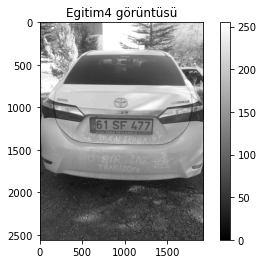

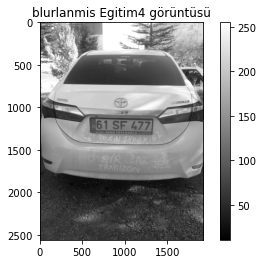

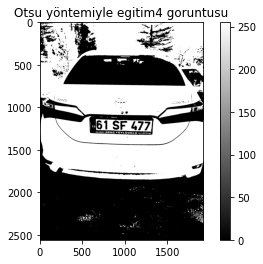

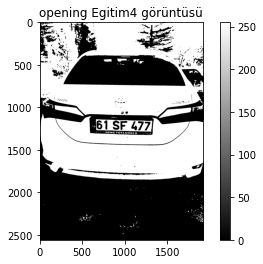

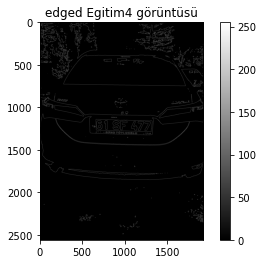

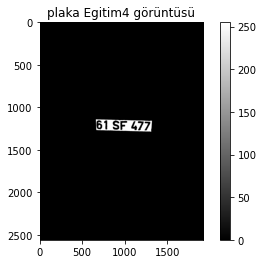

In [10]:
egitim = cv.imread("egitim4.pgm", 0)

plt.figure()
plt.imshow(egitim, cmap = "gray")
plt.title("Egitim4 görüntüsü")
plt.colorbar()

# gürültüyü azaltmak için blurlama işlemini yapabilecek bir filtre uygulanıyor

egitim = cv.bilateralFilter(egitim, 11, 17, 17)

plt.figure()
plt.imshow(egitim, cmap = "gray")
plt.title("blurlanmis Egitim4 görüntüsü")
plt.colorbar()

nrows_egitim = egitim.shape[0]
ncols_egitim = egitim.shape[1]

imageSize_egitim = nrows_egitim*ncols_egitim

maxPixel = np.amax(egitim) # görüntüdeki max pixel'e ulasmak icin
print("görüntünün max pixeli: ", maxPixel)

Hr_egitim = np.zeros(256) # H(r) başta 0 değerleri ile dolduruldu
Pr_egitim = np.zeros(256) # P(r) başta 0 değerleri ile dolduruldu
totalP_egitim = 0 # P(r)'nin toplamının 1 olması gerektiğini biliyorum
# kontrol amaçlı totalP değişkeni oluşturdum

for rows in range(nrows_egitim):
    for cols in range(ncols_egitim):
        r = int(egitim[rows, cols]) # pixel değeri r'ye atıldı
        Hr_egitim[r] = Hr_egitim[r] + 1 # r indexi +1 artırıldı
# böylece hangi pixelden kaç tane var bilmiş olacağız

for i in range(256):
    Pr_egitim[i] = Hr_egitim[i] / imageSize_egitim # P(r) oluşturuldu
    totalP_egitim = totalP_egitim + Pr_egitim[i] # kontrol amaçlı toplama
    
print("Toplam Pr = ", totalP_egitim)

# mean value hesabı

meanValue_egitim = 0

for i in range(256): # görüntü boyunca
    meanValue_egitim = meanValue_egitim + i*Pr_egitim[i] # tüm görüntü için mean value formülü
print("mean value = ", meanValue_egitim)

# total variance hesabı

totalVariance_egitim = 0

for i in range(256): # görüntü boyunca
    totalVariance_egitim = totalVariance_egitim + ((i - meanValue_egitim)**2) * Pr_egitim[i] # toplam varyans formülü
print("total variance = ", totalVariance_egitim)

# between group variance hesabı yapılacak
# her bir t (yani eşik değeri) için between group variance hesaplanacak
# hangi t değeri maksimumum değerini veriyorsa o değer eşik değeri olacak

sigmaB_Values_egitim = list() # sigma değerlerini saklamak için boş bir liste tanımladım

for t in range(1, 256):
    q1_egitim = np.sum(Pr_egitim[:t+1]) # q1 formülü uygulandı, 1'den t'ye kadar
    
    q2_egitim = np.sum(Pr_egitim[t:]) # q2 formülü uygulandı, t'den 256'ya kadar
    
    # her t değeri için hesaplama yapıldığı için nu1 ve nu2'yi her döngüde sıfıra eşitliyorum
    nu1_egitim = 0
    nu2_egitim = 0
    
    for t1 in range(1, t+1): # en son t değerini alması gerekmektedir, o yüzden range'i t+1'e kadar
        if (q1_egitim != 0):
            nu1_egitim = nu1_egitim + t1 * (Pr_egitim[t1] / q1_egitim) # nu1 formülü uygulandı
    
    for t2 in range(t+1, 256): # başlangıç değeri t+1 olmalı, 255'e kadar gidecek
        if (q2_egitim != 0):
            nu2_egitim = nu2_egitim + t2 * (Pr_egitim[t2] / q2_egitim) # nu2 formülü uygulandı

    sigmaB_egitim = q1_egitim*q2_egitim*((nu1_egitim - nu2_egitim)**2) # sigma formülü uygulandı
    sigmaB_Values_egitim.append(sigmaB_egitim) # sigma değerleri için tanımlanan boş listeye sigma değerleri atandı

print("maximum değere sahip index: ", np.argmax(sigmaB_Values_egitim))
# np.argmax() sayesinde maximum elemanın indexine ulaşıldı

T_egitim = np.argmax(sigmaB_Values_egitim)

egitim[egitim >= T_egitim] = 255
egitim[egitim < T_egitim] = 0

plt.figure()
plt.imshow(egitim, cmap = "gray")
plt.title("Otsu yöntemiyle egitim4 goruntusu")
plt.colorbar()

# plaka dikdörtgen olduğu için structuring elemen rect seçildi
# plakanın etrafındaki gürültüleri ve istenmeyen sembolleri baskılamak için
# opening kullanıldı

stEl = cv.getStructuringElement(cv.MORPH_RECT,(4,4))

opening = cv.morphologyEx(egitim, cv.MORPH_OPEN, stEl)

plt.figure()
plt.imshow(opening, cmap = "gray")
plt.title("opening Egitim4 görüntüsü")
plt.colorbar()

# sınırların net olması için edge detection yapıldı

edged = cv.Canny(opening, 30, 200) #Edge detection

plt.figure()
plt.imshow(edged, cmap = "gray")
plt.title("edged Egitim4 görüntüsü")
plt.colorbar()

# findContours ile siyah arkaplan üstündeki beyaz noktalar bulundu
# ilk argüman olarak uygulanacak görüntünün kopyası alındı
# çünkü bazı opencv versiyonlarında orijinal görüntüyü değiştiriyor

# keypoints denilen değişken ile bir şeklin sınırlarının koordinatları tutulur
# ikinci parametre RETR_TREE ile içiçe contourlar bir arada tutuldu
# üçüncü parametre CHAIN_APPROX_SIMPL ile plakadaki tüm noktalar değil de
# yalnızca köşelerdeki noktalar keypoint olarak tutuldu

corners = cv.findContours(edged.copy(), cv.RETR_TREE,
                                                     cv.CHAIN_APPROX_SIMPLE)

# bu keypointerden uygun contours'ları tutmak için tuple tipinde bir değişken:
contours = imutils.grab_contours(corners)

# bu tuple'lı sıralıyoruz ilk 10 contour'ı alıyoruz
contours = sorted(contours, key=cv.contourArea, reverse=True)[:10]

coordinate = None # koordinatları tutmak için değişken
for contour in contours: # belirlediğimiz contour'ların içindeyiz
    # approx ile dikdörtgen olmasını beklediğimiz nesneleri tutuyoruz
    # ikinci parametre ne kadar yüksek olursa yaklaşım yaparken toleransı o kadar yüksek olur
    approx = cv.approxPolyDP(contour, 10, True)
    if len(approx) == 4: # eğer yaklaşım 4 keypoint içeriyorsa
        coordinate = approx # koordinatımız o olsun
        break
print("plakanın koordinatları:\n", coordinate)

# şimdi yalnızca bu koordinattaki kısmı göreceğiz
# sıfırlardan oluşan(simsiyah), orijinal görüntüyle aynı boyutta bir maske
mask = np.zeros(egitim.shape, np.uint8) 

# drawContours ile maskenin üstünde belirlenen koordinatları çizdirdim
new_image = cv.drawContours(mask, [coordinate], 0,255, -1)
# orijinal görüntünün üstüne maskeyi bitwise_and fonksiyonu ile koydum
new_image = cv.bitwise_and(egitim, egitim, mask=mask)

# sadece belirlenen koordinatları gösteren görüntü new_image olarak elde edildi
plt.figure()
plt.imshow(new_image, cmap = "gray")
plt.title("plaka Egitim4 görüntüsü")
plt.colorbar()

---
---

# test1 görüntüsü

görüntünün max pixeli:  252
Toplam Pr =  0.9999999999999997
mean value =  147.30667622884116
total variance =  3332.0395505614338
maximum değere sahip index:  114
plakanın koordinatları:
 [[[ 69 149]]

 [[455 156]]

 [[460 233]]

 [[ 68 228]]]


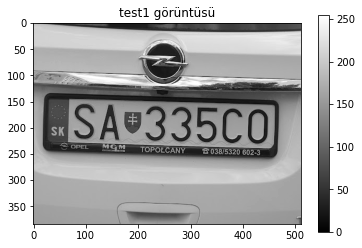

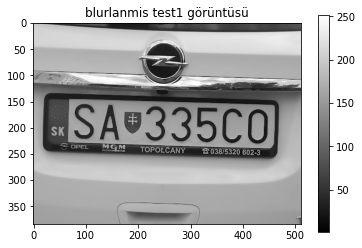

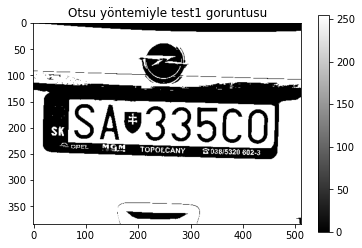

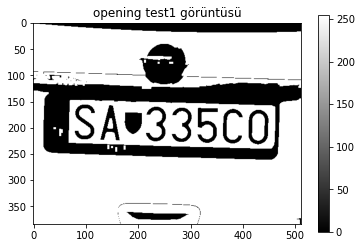

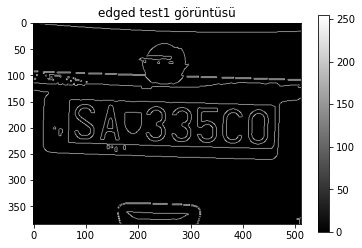

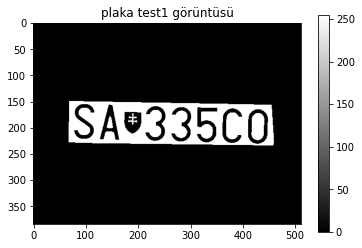

In [11]:
test = cv.imread("test1.pgm", 0)

plt.figure()
plt.imshow(test, cmap = "gray")
plt.title("test1 görüntüsü")
plt.colorbar()

# gürültüyü azaltmak için blurlama işlemini yapabilecek bir filtre uygulanıyor

test = cv.bilateralFilter(test, 11, 17, 17)

plt.figure()
plt.imshow(test, cmap = "gray")
plt.title("blurlanmis test1 görüntüsü")
plt.colorbar()

nrows_test = test.shape[0]
ncols_test = test.shape[1]

imageSize_test = nrows_test*ncols_test

maxPixel = np.amax(test) # görüntüdeki max pixel'e ulasmak icin
print("görüntünün max pixeli: ", maxPixel)

Hr_test = np.zeros(256) # H(r) başta 0 değerleri ile dolduruldu
Pr_test = np.zeros(256) # P(r) başta 0 değerleri ile dolduruldu
totalP_test = 0 # P(r)'nin toplamının 1 olması gerektiğini biliyorum
# kontrol amaçlı totalP değişkeni oluşturdum

for rows in range(nrows_test):
    for cols in range(ncols_test):
        r = int(test[rows, cols]) # pixel değeri r'ye atıldı
        Hr_test[r] = Hr_test[r] + 1 # r indexi +1 artırıldı
# böylece hangi pixelden kaç tane var bilmiş olacağız

for i in range(256):
    Pr_test[i] = Hr_test[i] / imageSize_test # P(r) oluşturuldu
    totalP_test = totalP_test + Pr_test[i] # kontrol amaçlı toplama
    
print("Toplam Pr = ", totalP_test)

# mean value hesabı

meanValue_test = 0

for i in range(256): # görüntü boyunca
    meanValue_test = meanValue_test + i*Pr_test[i] # tüm görüntü için mean value formülü
print("mean value = ", meanValue_test)

# total variance hesabı

totalVariance_test = 0

for i in range(256): # görüntü boyunca
    totalVariance_test = totalVariance_test + ((i - meanValue_test)**2) * Pr_test[i] # toplam varyans formülü
print("total variance = ", totalVariance_test)

# between group variance hesabı yapılacak
# her bir t (yani eşik değeri) için between group variance hesaplanacak
# hangi t değeri maksimumum değerini veriyorsa o değer eşik değeri olacak

sigmaB_Values_test = list() # sigma değerlerini saklamak için boş bir liste tanımladım

for t in range(1, 256):
    q1_test = np.sum(Pr_test[:t+1]) # q1 formülü uygulandı, 1'den t'ye kadar
    
    q2_test = np.sum(Pr_test[t:]) # q2 formülü uygulandı, t'den 256'ya kadar
    
    # her t değeri için hesaplama yapıldığı için nu1 ve nu2'yi her döngüde sıfıra eşitliyorum
    nu1_test = 0
    nu2_test = 0
    
    for t1 in range(1, t+1): # en son t değerini alması gerekmektedir, o yüzden range'i t+1'e kadar
        if (q1_test != 0):
            nu1_test = nu1_test + t1 * (Pr_test[t1] / q1_test) # nu1 formülü uygulandı
    
    for t2 in range(t+1, 256): # başlangıç değeri t+1 olmalı, 255'e kadar gidecek
        if (q2_test != 0):
            nu2_test = nu2_test + t2 * (Pr_test[t2] / q2_test) # nu2 formülü uygulandı

    sigmaB_test = q1_test*q2_test*((nu1_test - nu2_test)**2) # sigma formülü uygulandı
    sigmaB_Values_test.append(sigmaB_test) # sigma değerleri için tanımlanan boş listeye sigma değerleri atandı

print("maximum değere sahip index: ", np.argmax(sigmaB_Values_test))
# np.argmax() sayesinde maximum elemanın indexine ulaşıldı

T_test = np.argmax(sigmaB_Values_test)

test[test >= T_test] = 255
test[test < T_test] = 0

plt.figure()
plt.imshow(test, cmap = "gray")
plt.title("Otsu yöntemiyle test1 goruntusu")
plt.colorbar()

# plaka dikdörtgen olduğu için structuring elemen rect seçildi
# plakanın etrafındaki gürültüleri ve istenmeyen sembolleri baskılamak için
# opening kullanıldı

stEl = cv.getStructuringElement(cv.MORPH_RECT,(4,4))

opening = cv.morphologyEx(test, cv.MORPH_OPEN, stEl)

plt.figure()
plt.imshow(opening, cmap = "gray")
plt.title("opening test1 görüntüsü")
plt.colorbar()

# sınırların net olması için edge detection yapıldı

edged = cv.Canny(opening, 30, 200) #Edge detection

plt.figure()
plt.imshow(edged, cmap = "gray")
plt.title("edged test1 görüntüsü")
plt.colorbar()

# findContours ile siyah arkaplan üstündeki beyaz noktalar bulundu
# ilk argüman olarak uygulanacak görüntünün kopyası alındı
# çünkü bazı opencv versiyonlarında orijinal görüntüyü değiştiriyor

# keypoints denilen değişken ile bir şeklin sınırlarının koordinatları tutulur
# ikinci parametre RETR_TREE ile içiçe contourlar bir arada tutuldu
# üçüncü parametre CHAIN_APPROX_SIMPL ile plakadaki tüm noktalar değil de
# yalnızca köşelerdeki noktalar keypoint olarak tutuldu

corners = cv.findContours(edged.copy(), cv.RETR_TREE,
                                                     cv.CHAIN_APPROX_SIMPLE)

# bu keypointerden uygun contours'ları tutmak için tuple tipinde bir değişken:
contours = imutils.grab_contours(corners)

# bu tuple'lı sıralıyoruz ilk 10 contour'ı alıyoruz
contours = sorted(contours, key=cv.contourArea, reverse=True)[:10]

coordinate = None # koordinatları tutmak için değişken
for contour in contours: # belirlediğimiz contour'ların içindeyiz
    # approx ile dikdörtgen olmasını beklediğimiz nesneleri tutuyoruz
    # ikinci parametre ne kadar yüksek olursa yaklaşım yaparken toleransı o kadar yüksek olur
    approx = cv.approxPolyDP(contour, 10, True)
    if len(approx) == 4: # eğer yaklaşım 4 keypoint içeriyorsa
        coordinate = approx # koordinatımız o olsun
        break
print("plakanın koordinatları:\n", coordinate)

# şimdi yalnızca bu koordinattaki kısmı göreceğiz
# sıfırlardan oluşan(simsiyah), orijinal görüntüyle aynı boyutta bir maske
mask = np.zeros(test.shape, np.uint8) 

# drawContours ile maskenin üstünde belirlenen koordinatları çizdirdim
new_image = cv.drawContours(mask, [coordinate], 0,255, -1)
# orijinal görüntünün üstüne maskeyi bitwise_and fonksiyonu ile koydum
new_image = cv.bitwise_and(test, test, mask=mask)

# sadece belirlenen koordinatları gösteren görüntü new_image olarak elde edildi
plt.figure()
plt.imshow(new_image, cmap = "gray")
plt.title("plaka test1 görüntüsü")
plt.colorbar()

# test2 görüntüsü

görüntünün max pixeli:  255
Toplam Pr =  1.0
mean value =  204.33184879725087
total variance =  2369.424220018375
maximum değere sahip index:  167
plakanın koordinatları:
 [[[425 122]]

 [[426 179]]

 [[533 179]]

 [[533 121]]]


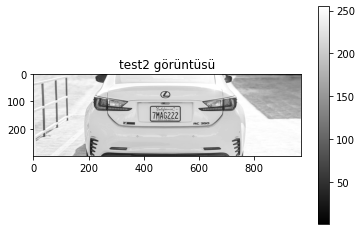

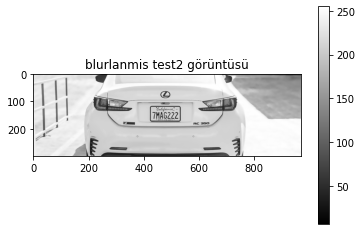

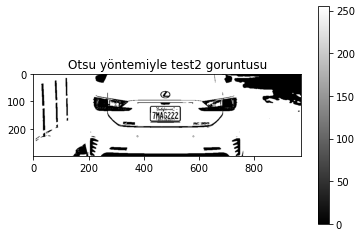

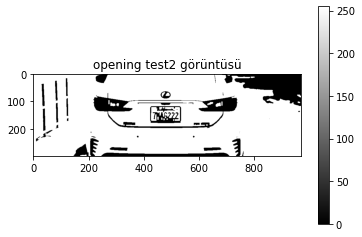

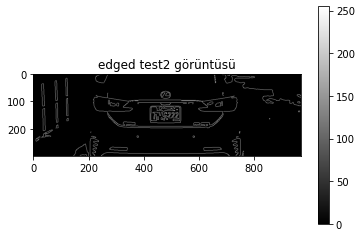

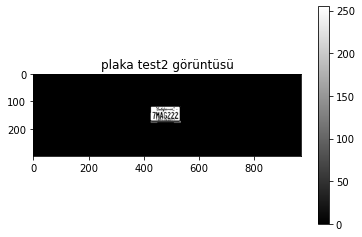

In [12]:
test = cv.imread("test2.pgm", 0)

plt.figure()
plt.imshow(test, cmap = "gray")
plt.title("test2 görüntüsü")
plt.colorbar()

# gürültüyü azaltmak için blurlama işlemini yapabilecek bir filtre uygulanıyor

test = cv.bilateralFilter(test, 11, 17, 17)

plt.figure()
plt.imshow(test, cmap = "gray")
plt.title("blurlanmis test2 görüntüsü")
plt.colorbar()

nrows_test = test.shape[0]
ncols_test = test.shape[1]

imageSize_test = nrows_test*ncols_test

maxPixel = np.amax(test) # görüntüdeki max pixel'e ulasmak icin
print("görüntünün max pixeli: ", maxPixel)

Hr_test = np.zeros(256) # H(r) başta 0 değerleri ile dolduruldu
Pr_test = np.zeros(256) # P(r) başta 0 değerleri ile dolduruldu
totalP_test = 0 # P(r)'nin toplamının 1 olması gerektiğini biliyorum
# kontrol amaçlı totalP değişkeni oluşturdum

for rows in range(nrows_test):
    for cols in range(ncols_test):
        r = int(test[rows, cols]) # pixel değeri r'ye atıldı
        Hr_test[r] = Hr_test[r] + 1 # r indexi +1 artırıldı
# böylece hangi pixelden kaç tane var bilmiş olacağız

for i in range(256):
    Pr_test[i] = Hr_test[i] / imageSize_test # P(r) oluşturuldu
    totalP_test = totalP_test + Pr_test[i] # kontrol amaçlı toplama
    
print("Toplam Pr = ", totalP_test)

# mean value hesabı

meanValue_test = 0

for i in range(256): # görüntü boyunca
    meanValue_test = meanValue_test + i*Pr_test[i] # tüm görüntü için mean value formülü
print("mean value = ", meanValue_test)

# total variance hesabı

totalVariance_test = 0

for i in range(256): # görüntü boyunca
    totalVariance_test = totalVariance_test + ((i - meanValue_test)**2) * Pr_test[i] # toplam varyans formülü
print("total variance = ", totalVariance_test)

# between group variance hesabı yapılacak
# her bir t (yani eşik değeri) için between group variance hesaplanacak
# hangi t değeri maksimumum değerini veriyorsa o değer eşik değeri olacak

sigmaB_Values_test = list() # sigma değerlerini saklamak için boş bir liste tanımladım

for t in range(1, 256):
    q1_test = np.sum(Pr_test[:t+1]) # q1 formülü uygulandı, 1'den t'ye kadar
    
    q2_test = np.sum(Pr_test[t:]) # q2 formülü uygulandı, t'den 256'ya kadar
    
    # her t değeri için hesaplama yapıldığı için nu1 ve nu2'yi her döngüde sıfıra eşitliyorum
    nu1_test = 0
    nu2_test = 0
    
    for t1 in range(1, t+1): # en son t değerini alması gerekmektedir, o yüzden range'i t+1'e kadar
        if (q1_test != 0):
            nu1_test = nu1_test + t1 * (Pr_test[t1] / q1_test) # nu1 formülü uygulandı
    
    for t2 in range(t+1, 256): # başlangıç değeri t+1 olmalı, 255'e kadar gidecek
        if (q2_test != 0):
            nu2_test = nu2_test + t2 * (Pr_test[t2] / q2_test) # nu2 formülü uygulandı

    sigmaB_test = q1_test*q2_test*((nu1_test - nu2_test)**2) # sigma formülü uygulandı
    sigmaB_Values_test.append(sigmaB_test) # sigma değerleri için tanımlanan boş listeye sigma değerleri atandı

print("maximum değere sahip index: ", np.argmax(sigmaB_Values_test))
# np.argmax() sayesinde maximum elemanın indexine ulaşıldı

T_test = np.argmax(sigmaB_Values_test)

test[test >= T_test] = 255
test[test < T_test] = 0

plt.figure()
plt.imshow(test, cmap = "gray")
plt.title("Otsu yöntemiyle test2 goruntusu")
plt.colorbar()

# plaka dikdörtgen olduğu için structuring elemen rect seçildi
# plakanın etrafındaki gürültüleri ve istenmeyen sembolleri baskılamak için
# opening kullanıldı

stEl = cv.getStructuringElement(cv.MORPH_RECT,(4,4))

opening = cv.morphologyEx(test, cv.MORPH_OPEN, stEl)

plt.figure()
plt.imshow(opening, cmap = "gray")
plt.title("opening test2 görüntüsü")
plt.colorbar()

# sınırların net olması için edge detection yapıldı

edged = cv.Canny(opening, 30, 200) #Edge detection

plt.figure()
plt.imshow(edged, cmap = "gray")
plt.title("edged test2 görüntüsü")
plt.colorbar()

# findContours ile siyah arkaplan üstündeki beyaz noktalar bulundu
# ilk argüman olarak uygulanacak görüntünün kopyası alındı
# çünkü bazı opencv versiyonlarında orijinal görüntüyü değiştiriyor

# keypoints denilen değişken ile bir şeklin sınırlarının koordinatları tutulur
# ikinci parametre RETR_TREE ile içiçe contourlar bir arada tutuldu
# üçüncü parametre CHAIN_APPROX_SIMPL ile plakadaki tüm noktalar değil de
# yalnızca köşelerdeki noktalar keypoint olarak tutuldu

corners = cv.findContours(edged.copy(), cv.RETR_TREE,
                                                     cv.CHAIN_APPROX_SIMPLE)

# bu keypointerden uygun contours'ları tutmak için tuple tipinde bir değişken:
contours = imutils.grab_contours(corners)

# bu tuple'lı sıralıyoruz ilk 10 contour'ı alıyoruz
contours = sorted(contours, key=cv.contourArea, reverse=True)[:10]

coordinate = None # koordinatları tutmak için değişken
for contour in contours: # belirlediğimiz contour'ların içindeyiz
    # approx ile dikdörtgen olmasını beklediğimiz nesneleri tutuyoruz
    # ikinci parametre ne kadar yüksek olursa yaklaşım yaparken toleransı o kadar yüksek olur
    approx = cv.approxPolyDP(contour, 10, True)
    if len(approx) == 4: # eğer yaklaşım 4 keypoint içeriyorsa
        coordinate = approx # koordinatımız o olsun
        break
print("plakanın koordinatları:\n", coordinate)

# şimdi yalnızca bu koordinattaki kısmı göreceğiz
# sıfırlardan oluşan(simsiyah), orijinal görüntüyle aynı boyutta bir maske
mask = np.zeros(test.shape, np.uint8) 

# drawContours ile maskenin üstünde belirlenen koordinatları çizdirdim
new_image = cv.drawContours(mask, [coordinate], 0,255, -1)
# orijinal görüntünün üstüne maskeyi bitwise_and fonksiyonu ile koydum
new_image = cv.bitwise_and(test, test, mask=mask)

# sadece belirlenen koordinatları gösteren görüntü new_image olarak elde edildi
plt.figure()
plt.imshow(new_image, cmap = "gray")
plt.title("plaka test2 görüntüsü")
plt.colorbar()

# test3 görüntüsü

görüntünün max pixeli:  255
Toplam Pr =  1.0
mean value =  144.5659751689454
total variance =  8345.256459786911
maximum değere sahip index:  121
plakanın koordinatları:
 [[[369 322]]

 [[373 353]]

 [[457 349]]

 [[456 319]]]


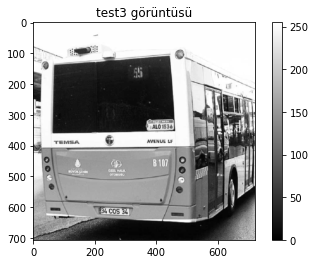

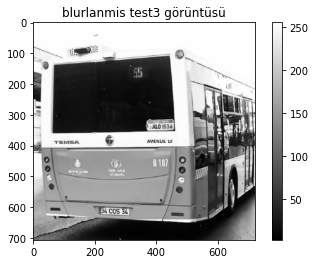

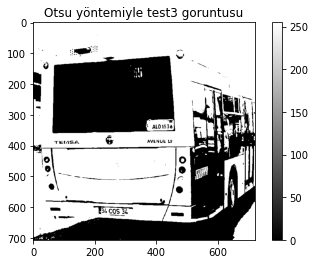

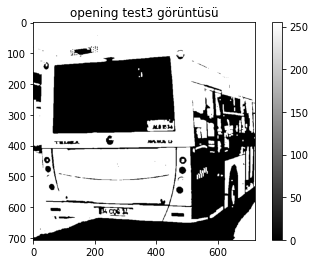

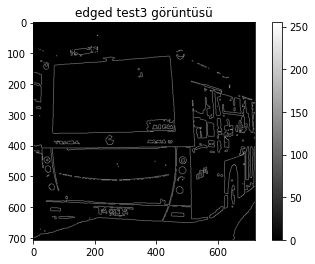

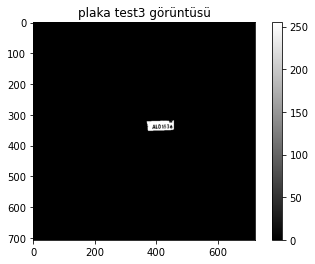

In [13]:
test = cv.imread("test3.pgm", 0)

plt.figure()
plt.imshow(test, cmap = "gray")
plt.title("test3 görüntüsü")
plt.colorbar()

# gürültüyü azaltmak için blurlama işlemini yapabilecek bir filtre uygulanıyor

test = cv.bilateralFilter(test, 11, 17, 17)

plt.figure()
plt.imshow(test, cmap = "gray")
plt.title("blurlanmis test3 görüntüsü")
plt.colorbar()

nrows_test = test.shape[0]
ncols_test = test.shape[1]

imageSize_test = nrows_test*ncols_test

maxPixel = np.amax(test) # görüntüdeki max pixel'e ulasmak icin
print("görüntünün max pixeli: ", maxPixel)

Hr_test = np.zeros(256) # H(r) başta 0 değerleri ile dolduruldu
Pr_test = np.zeros(256) # P(r) başta 0 değerleri ile dolduruldu
totalP_test = 0 # P(r)'nin toplamının 1 olması gerektiğini biliyorum
# kontrol amaçlı totalP değişkeni oluşturdum

for rows in range(nrows_test):
    for cols in range(ncols_test):
        r = int(test[rows, cols]) # pixel değeri r'ye atıldı
        Hr_test[r] = Hr_test[r] + 1 # r indexi +1 artırıldı
# böylece hangi pixelden kaç tane var bilmiş olacağız

for i in range(256):
    Pr_test[i] = Hr_test[i] / imageSize_test # P(r) oluşturuldu
    totalP_test = totalP_test + Pr_test[i] # kontrol amaçlı toplama
    
print("Toplam Pr = ", totalP_test)

# mean value hesabı

meanValue_test = 0

for i in range(256): # görüntü boyunca
    meanValue_test = meanValue_test + i*Pr_test[i] # tüm görüntü için mean value formülü
print("mean value = ", meanValue_test)

# total variance hesabı

totalVariance_test = 0

for i in range(256): # görüntü boyunca
    totalVariance_test = totalVariance_test + ((i - meanValue_test)**2) * Pr_test[i] # toplam varyans formülü
print("total variance = ", totalVariance_test)

# between group variance hesabı yapılacak
# her bir t (yani eşik değeri) için between group variance hesaplanacak
# hangi t değeri maksimumum değerini veriyorsa o değer eşik değeri olacak

sigmaB_Values_test = list() # sigma değerlerini saklamak için boş bir liste tanımladım

for t in range(1, 256):
    q1_test = np.sum(Pr_test[:t+1]) # q1 formülü uygulandı, 1'den t'ye kadar
    
    q2_test = np.sum(Pr_test[t:]) # q2 formülü uygulandı, t'den 256'ya kadar
    
    # her t değeri için hesaplama yapıldığı için nu1 ve nu2'yi her döngüde sıfıra eşitliyorum
    nu1_test = 0
    nu2_test = 0
    
    for t1 in range(1, t+1): # en son t değerini alması gerekmektedir, o yüzden range'i t+1'e kadar
        if (q1_test != 0):
            nu1_test = nu1_test + t1 * (Pr_test[t1] / q1_test) # nu1 formülü uygulandı
    
    for t2 in range(t+1, 256): # başlangıç değeri t+1 olmalı, 255'e kadar gidecek
        if (q2_test != 0):
            nu2_test = nu2_test + t2 * (Pr_test[t2] / q2_test) # nu2 formülü uygulandı

    sigmaB_test = q1_test*q2_test*((nu1_test - nu2_test)**2) # sigma formülü uygulandı
    sigmaB_Values_test.append(sigmaB_test) # sigma değerleri için tanımlanan boş listeye sigma değerleri atandı

print("maximum değere sahip index: ", np.argmax(sigmaB_Values_test))
# np.argmax() sayesinde maximum elemanın indexine ulaşıldı

T_test = np.argmax(sigmaB_Values_test)

test[test >= T_test] = 255
test[test < T_test] = 0

plt.figure()
plt.imshow(test, cmap = "gray")
plt.title("Otsu yöntemiyle test3 goruntusu")
plt.colorbar()

# plaka dikdörtgen olduğu için structuring elemen rect seçildi
# plakanın etrafındaki gürültüleri ve istenmeyen sembolleri baskılamak için
# opening kullanıldı

stEl = cv.getStructuringElement(cv.MORPH_RECT,(4,4))

opening = cv.morphologyEx(test, cv.MORPH_OPEN, stEl)

plt.figure()
plt.imshow(opening, cmap = "gray")
plt.title("opening test3 görüntüsü")
plt.colorbar()

# sınırların net olması için edge detection yapıldı

edged = cv.Canny(opening, 30, 200) #Edge detection

plt.figure()
plt.imshow(edged, cmap = "gray")
plt.title("edged test3 görüntüsü")
plt.colorbar()

# findContours ile siyah arkaplan üstündeki beyaz noktalar bulundu
# ilk argüman olarak uygulanacak görüntünün kopyası alındı
# çünkü bazı opencv versiyonlarında orijinal görüntüyü değiştiriyor

# keypoints denilen değişken ile bir şeklin sınırlarının koordinatları tutulur
# ikinci parametre RETR_TREE ile içiçe contourlar bir arada tutuldu
# üçüncü parametre CHAIN_APPROX_SIMPL ile plakadaki tüm noktalar değil de
# yalnızca köşelerdeki noktalar keypoint olarak tutuldu

corners = cv.findContours(edged.copy(), cv.RETR_TREE,
                                                     cv.CHAIN_APPROX_SIMPLE)

# bu keypointerden uygun contours'ları tutmak için tuple tipinde bir değişken:
contours = imutils.grab_contours(corners)

# bu tuple'lı sıralıyoruz ilk 10 contour'ı alıyoruz
contours = sorted(contours, key=cv.contourArea, reverse=True)[:10]

coordinate = None # koordinatları tutmak için değişken
for contour in contours: # belirlediğimiz contour'ların içindeyiz
    # approx ile dikdörtgen olmasını beklediğimiz nesneleri tutuyoruz
    # ikinci parametre ne kadar yüksek olursa yaklaşım yaparken toleransı o kadar yüksek olur
    approx = cv.approxPolyDP(contour, 10, True)
    if len(approx) == 4: # eğer yaklaşım 4 keypoint içeriyorsa
        coordinate = approx # koordinatımız o olsun
        break
print("plakanın koordinatları:\n", coordinate)

# şimdi yalnızca bu koordinattaki kısmı göreceğiz
# sıfırlardan oluşan(simsiyah), orijinal görüntüyle aynı boyutta bir maske
mask = np.zeros(test.shape, np.uint8) 

# drawContours ile maskenin üstünde belirlenen koordinatları çizdirdim
new_image = cv.drawContours(mask, [coordinate], 0,255, -1)
# orijinal görüntünün üstüne maskeyi bitwise_and fonksiyonu ile koydum
new_image = cv.bitwise_and(test, test, mask=mask)

# sadece belirlenen koordinatları gösteren görüntü new_image olarak elde edildi
plt.figure()
plt.imshow(new_image, cmap = "gray")
plt.title("plaka test3 görüntüsü")
plt.colorbar()

# test4 görüntüsü

görüntünün max pixeli:  254
Toplam Pr =  1.0000000000000002
mean value =  99.40907718120803
total variance =  5864.258574950046
maximum değere sahip index:  136
plakanın koordinatları:
 [[[247 117]]

 [[270 133]]

 [[473 133]]

 [[385 115]]]


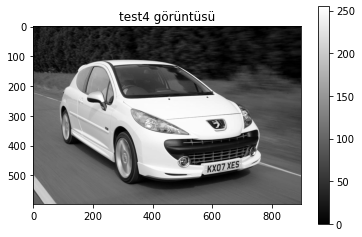

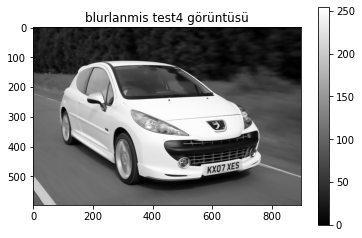

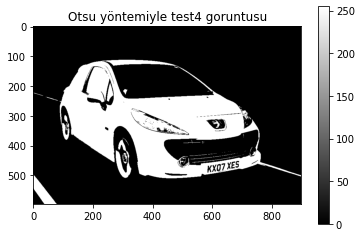

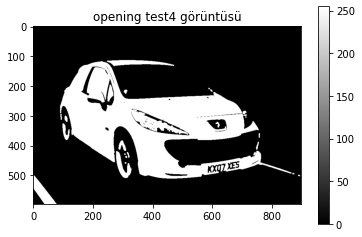

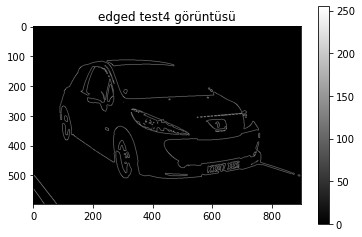

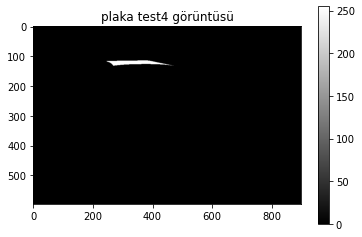

In [14]:
test = cv.imread("test4.pgm", 0)

plt.figure()
plt.imshow(test, cmap = "gray")
plt.title("test4 görüntüsü")
plt.colorbar()

# gürültüyü azaltmak için blurlama işlemini yapabilecek bir filtre uygulanıyor

test = cv.bilateralFilter(test, 11, 17, 17)

plt.figure()
plt.imshow(test, cmap = "gray")
plt.title("blurlanmis test4 görüntüsü")
plt.colorbar()

nrows_test = test.shape[0]
ncols_test = test.shape[1]

imageSize_test = nrows_test*ncols_test

maxPixel = np.amax(test) # görüntüdeki max pixel'e ulasmak icin
print("görüntünün max pixeli: ", maxPixel)

Hr_test = np.zeros(256) # H(r) başta 0 değerleri ile dolduruldu
Pr_test = np.zeros(256) # P(r) başta 0 değerleri ile dolduruldu
totalP_test = 0 # P(r)'nin toplamının 1 olması gerektiğini biliyorum
# kontrol amaçlı totalP değişkeni oluşturdum

for rows in range(nrows_test):
    for cols in range(ncols_test):
        r = int(test[rows, cols]) # pixel değeri r'ye atıldı
        Hr_test[r] = Hr_test[r] + 1 # r indexi +1 artırıldı
# böylece hangi pixelden kaç tane var bilmiş olacağız

for i in range(256):
    Pr_test[i] = Hr_test[i] / imageSize_test # P(r) oluşturuldu
    totalP_test = totalP_test + Pr_test[i] # kontrol amaçlı toplama
    
print("Toplam Pr = ", totalP_test)

# mean value hesabı

meanValue_test = 0

for i in range(256): # görüntü boyunca
    meanValue_test = meanValue_test + i*Pr_test[i] # tüm görüntü için mean value formülü
print("mean value = ", meanValue_test)

# total variance hesabı

totalVariance_test = 0

for i in range(256): # görüntü boyunca
    totalVariance_test = totalVariance_test + ((i - meanValue_test)**2) * Pr_test[i] # toplam varyans formülü
print("total variance = ", totalVariance_test)

# between group variance hesabı yapılacak
# her bir t (yani eşik değeri) için between group variance hesaplanacak
# hangi t değeri maksimumum değerini veriyorsa o değer eşik değeri olacak

sigmaB_Values_test = list() # sigma değerlerini saklamak için boş bir liste tanımladım

for t in range(1, 256):
    q1_test = np.sum(Pr_test[:t+1]) # q1 formülü uygulandı, 1'den t'ye kadar
    
    q2_test = np.sum(Pr_test[t:]) # q2 formülü uygulandı, t'den 256'ya kadar
    
    # her t değeri için hesaplama yapıldığı için nu1 ve nu2'yi her döngüde sıfıra eşitliyorum
    nu1_test = 0
    nu2_test = 0
    
    for t1 in range(1, t+1): # en son t değerini alması gerekmektedir, o yüzden range'i t+1'e kadar
        if (q1_test != 0):
            nu1_test = nu1_test + t1 * (Pr_test[t1] / q1_test) # nu1 formülü uygulandı
    
    for t2 in range(t+1, 256): # başlangıç değeri t+1 olmalı, 255'e kadar gidecek
        if (q2_test != 0):
            nu2_test = nu2_test + t2 * (Pr_test[t2] / q2_test) # nu2 formülü uygulandı

    sigmaB_test = q1_test*q2_test*((nu1_test - nu2_test)**2) # sigma formülü uygulandı
    sigmaB_Values_test.append(sigmaB_test) # sigma değerleri için tanımlanan boş listeye sigma değerleri atandı

print("maximum değere sahip index: ", np.argmax(sigmaB_Values_test))
# np.argmax() sayesinde maximum elemanın indexine ulaşıldı

T_test = np.argmax(sigmaB_Values_test)

test[test >= T_test] = 255
test[test < T_test] = 0

plt.figure()
plt.imshow(test, cmap = "gray")
plt.title("Otsu yöntemiyle test4 goruntusu")
plt.colorbar()

# plaka dikdörtgen olduğu için structuring elemen rect seçildi
# plakanın etrafındaki gürültüleri ve istenmeyen sembolleri baskılamak için
# opening kullanıldı

stEl = cv.getStructuringElement(cv.MORPH_RECT,(4,4))

opening = cv.morphologyEx(test, cv.MORPH_OPEN, stEl)

plt.figure()
plt.imshow(opening, cmap = "gray")
plt.title("opening test4 görüntüsü")
plt.colorbar()

# sınırların net olması için edge detection yapıldı

edged = cv.Canny(opening, 30, 200) #Edge detection

plt.figure()
plt.imshow(edged, cmap = "gray")
plt.title("edged test4 görüntüsü")
plt.colorbar()

# findContours ile siyah arkaplan üstündeki beyaz noktalar bulundu
# ilk argüman olarak uygulanacak görüntünün kopyası alındı
# çünkü bazı opencv versiyonlarında orijinal görüntüyü değiştiriyor

# keypoints denilen değişken ile bir şeklin sınırlarının koordinatları tutulur
# ikinci parametre RETR_TREE ile içiçe contourlar bir arada tutuldu
# üçüncü parametre CHAIN_APPROX_SIMPL ile plakadaki tüm noktalar değil de
# yalnızca köşelerdeki noktalar keypoint olarak tutuldu

corners = cv.findContours(edged.copy(), cv.RETR_TREE,
                                                     cv.CHAIN_APPROX_SIMPLE)

# bu keypointerden uygun contours'ları tutmak için tuple tipinde bir değişken:
contours = imutils.grab_contours(corners)

# bu tuple'lı sıralıyoruz ilk 10 contour'ı alıyoruz
contours = sorted(contours, key=cv.contourArea, reverse=True)[:10]

coordinate = None # koordinatları tutmak için değişken
for contour in contours: # belirlediğimiz contour'ların içindeyiz
    # approx ile dikdörtgen olmasını beklediğimiz nesneleri tutuyoruz
    # ikinci parametre ne kadar yüksek olursa yaklaşım yaparken toleransı o kadar yüksek olur
    approx = cv.approxPolyDP(contour, 10, True)
    if len(approx) == 4: # eğer yaklaşım 4 keypoint içeriyorsa
        coordinate = approx # koordinatımız o olsun
        break
print("plakanın koordinatları:\n", coordinate)

# şimdi yalnızca bu koordinattaki kısmı göreceğiz
# sıfırlardan oluşan(simsiyah), orijinal görüntüyle aynı boyutta bir maske
mask = np.zeros(test.shape, np.uint8) 

# drawContours ile maskenin üstünde belirlenen koordinatları çizdirdim
new_image = cv.drawContours(mask, [coordinate], 0,255, -1)
# orijinal görüntünün üstüne maskeyi bitwise_and fonksiyonu ile koydum
new_image = cv.bitwise_and(test, test, mask=mask)

# sadece belirlenen koordinatları gösteren görüntü new_image olarak elde edildi
plt.figure()
plt.imshow(new_image, cmap = "gray")
plt.title("plaka test4 görüntüsü")
plt.colorbar()